
# **Initiate and Configure Spark**

---


In [ ]:
!pip3 install pyspark
from pyspark.sql import SparkSession
spark = (SparkSession
         .builder
         .appName("ML")
         .config("spark.some.config.option","some-value")
         .getOrCreate())

     |████████████████████████████████| 281.4 MB 35 kB/s 
     |████████████████████████████████| 198 kB 58.0 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=eb79b218eb535dc32f6e0c4cec10a051203f024c954cf124bfaffdbde89e4c85
  Stored in directory: /root/.cache/pip/wheels/9f/f5/07/7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built pyspark



# **Load Data**

---


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
UNSWNB15 = spark.read.csv('drive/MyDrive/UNSW-NB15.csv', inferSchema=True)

In [ ]:
UNSWNB15.columns

['_c0',
 '_c1',
 '_c2',
 '_c3',
 '_c4',
 '_c5',
 '_c6',
 '_c7',
 '_c8',
 '_c9',
 '_c10',
 '_c11',
 '_c12',
 '_c13',
 '_c14',
 '_c15',
 '_c16',
 '_c17',
 '_c18',
 '_c19',
 '_c20',
 '_c21',
 '_c22',
 '_c23',
 '_c24',
 '_c25',
 '_c26',
 '_c27',
 '_c28',
 '_c29',
 '_c30',
 '_c31',
 '_c32',
 '_c33',
 '_c34',
 '_c35',
 '_c36',
 '_c37',
 '_c38',
 '_c39',
 '_c40',
 '_c41',
 '_c42',
 '_c43',
 '_c44',
 '_c45',
 '_c46',
 '_c47',
 '_c48']

In [ ]:
UNSWNB15 = (UNSWNB15.withColumnRenamed("_c0","srcip")
    .withColumnRenamed("_c1","sport")
    .withColumnRenamed("_c2","dstip")
    .withColumnRenamed("_c3","dsport")
    .withColumnRenamed("_c4","proto")
    .withColumnRenamed("_c5","state")
    .withColumnRenamed("_c6","dur")
    .withColumnRenamed("_c7","sbytes")
    .withColumnRenamed("_c8","dbytes")
    .withColumnRenamed("_c9","sttl")
    .withColumnRenamed("_c10","dttl")
    .withColumnRenamed("_c11","sloss")
    .withColumnRenamed("_c12","dloss")
    .withColumnRenamed("_c13","service")
    .withColumnRenamed("_c14","Sload")
    .withColumnRenamed("_c15","Dload")
    .withColumnRenamed("_c16","Spkts")
    .withColumnRenamed("_c17","Dpkts")
    .withColumnRenamed("_c18","swin")
    .withColumnRenamed("_c19","dwin")
    .withColumnRenamed("_c20","stcpb")
    .withColumnRenamed("_c21","dtcpb")
    .withColumnRenamed("_c22","smeansz")
    .withColumnRenamed("_c23","dmeansz")
    .withColumnRenamed("_c24","trans_depth")
    .withColumnRenamed("_c25","res_bdy_len")
    .withColumnRenamed("_c26","Sjit")
    .withColumnRenamed("_c27","Djit")
    .withColumnRenamed("_c28","Stime")
    .withColumnRenamed("_c29","Ltime")
    .withColumnRenamed("_c30","Sintpkt")
    .withColumnRenamed("_c31","Dintpkt")
    .withColumnRenamed("_c32","tcprtt")
    .withColumnRenamed("_c33","synack")
    .withColumnRenamed("_c34","ackdat")
    .withColumnRenamed("_c35","is_sm_ips_ports")
    .withColumnRenamed("_c36","ct_state_ttl")
    .withColumnRenamed("_c37","ct_flw_http_mthd")
    .withColumnRenamed("_c38","is_ftp_login")
    .withColumnRenamed("_c39","ct_ftp_cmd")
    .withColumnRenamed("_c40","ct_srv_src")
    .withColumnRenamed("_c41","ct_srv_dst")
    .withColumnRenamed("_c42","ct_dst_ltm")
    .withColumnRenamed("_c43","ct_src_ltm")
    .withColumnRenamed("_c44","ct_src_dport_ltm")
    .withColumnRenamed("_c45","ct_dst_sport_ltm")
    .withColumnRenamed("_c46","ct_dst_src_ltm")
    .withColumnRenamed("_c47","attack_cat")
    .withColumnRenamed("_c48","Label")
   )
   
UNSWNB15.show()

+----------+-----+-------------+------+-----+-----+------------+------+------+----+----+-----+-----+--------+---------+---------+-----+-----+----+----+----------+----------+-------+-------+-----------+-----------+----------+---------+----------+----------+------------+------------+------------+------------+------------+---------------+------------+----------------+------------+----------+----------+----------+----------+----------+----------------+----------------+--------------+----------+-----+
|     srcip|sport|        dstip|dsport|proto|state|         dur|sbytes|dbytes|sttl|dttl|sloss|dloss| service|    Sload|    Dload|Spkts|Dpkts|swin|dwin|     stcpb|     dtcpb|smeansz|dmeansz|trans_depth|res_bdy_len|      Sjit|     Djit|     Stime|     Ltime|     Sintpkt|     Dintpkt|      tcprtt|      synack|      ackdat|is_sm_ips_ports|ct_state_ttl|ct_flw_http_mthd|is_ftp_login|ct_ftp_cmd|ct_srv_src|ct_srv_dst|ct_dst_ltm|ct_src_ltm|ct_src_dport_ltm|ct_dst_sport_ltm|ct_dst_src_ltm|attack_cat|Lab

In [ ]:
UNSWNB15.describe().select("Summary","srcip","sport","dstip","dsport","proto","state","dur","sbytes","dbytes").show()

+-------+-----------+------------------+-----------+------------------+-------+-------+------------------+-----------------+------------------+
|Summary|      srcip|             sport|      dstip|            dsport|  proto|  state|               dur|           sbytes|            dbytes|
+-------+-----------+------------------+-----------+------------------+-------+-------+------------------+-----------------+------------------+
|  count|    2539739|           2539739|    2539739|           2539739|2539739|2539739|           2539739|          2539739|           2539739|
|   mean|       null| 30536.93108583205|       null|11235.096788685767|   null|   null|0.6588634003800393|4340.072263330996| 36432.01132478574|
| stddev|       null|20441.216792342224|       null| 18438.20083577165|   null|   null|13.925767633289283|56409.39812286232|161105.30400824756|
|    min|10.40.170.2|                 0|10.40.170.2|                 0|    3pc|    ACC|               0.0|                0|            

In [ ]:
UNSWNB15.describe().select("Summary","sttl","dttl","sloss","dloss","service","Sload","Dload","Spkts").show()

+-------+-----------------+------------------+-----------------+------------------+-------+--------------------+-----------------+-----------------+
|Summary|             sttl|              dttl|            sloss|             dloss|service|               Sload|            Dload|            Spkts|
+-------+-----------------+------------------+-----------------+------------------+-------+--------------------+-----------------+-----------------+
|  count|          2539739|           2539739|          2539739|           2539739|2539739|             2539739|          2539739|          2539739|
|   mean|62.78149802007214|   30.770440978384|5.164547223159545|16.331423819534212|   null| 3.694927939363408E7|2451158.440857539| 33.2925678583508|
| stddev|74.62669956848524|42.851922189518724|22.51836838779722|56.597890353205116|   null|1.1860413786386509E8|4225032.897503491|76.28775585678378|
|    min|                0|                 0|                0|                 0|      -|               

In [ ]:
UNSWNB15.describe().select("Summary","Dpkts","swin","dwin","stcpb","dtcpb","smeansz","dmeansz").show()


+-------+------------------+------------------+------------------+--------------------+--------------------+------------------+------------------+
|Summary|             Dpkts|              swin|              dwin|               stcpb|               dtcpb|           smeansz|           dmeansz|
+-------+------------------+------------------+------------------+--------------------+--------------------+------------------+------------------+
|  count|           2539739|           2539739|           2539739|             2539739|             2539739|           2539739|           2539739|
|   mean|42.731821655689814|150.10695075360107|149.76404347060858|1.2618542900429437E9|1.2619194806546414E9|124.25270588828222|276.70543193611627|
| stddev|121.50842004704197|125.47913122211004|125.54062192608511| 1.422045057823864E9| 1.422157469789883E9|151.92108772283464| 335.6231650135929|
|    min|                 0|                 0|                 0|                   0|                   0|          

In [ ]:
UNSWNB15.describe().select("Summary","trans_depth","res_bdy_len","Sjit","Djit","Stime","Ltime","Sintpkt").show()   

+-------+-------------------+------------------+------------------+------------------+--------------------+--------------------+------------------+
|Summary|        trans_depth|       res_bdy_len|              Sjit|              Djit|               Stime|               Ltime|           Sintpkt|
+-------+-------------------+------------------+------------------+------------------+--------------------+--------------------+------------------+
|  count|            2539739|           2539739|           2539739|           2539739|             2539739|             2539739|           2539739|
|   mean|0.08326328020320198| 4242.632264575218|1589.1543650105623| 730.1640026779703|1.4232606949103932E9|1.4232606956744623E9| 193.0465504924596|
| stddev|0.35002455674771116|47503.383153168135|16911.377637309888|3438.7574708801694|  1134456.4636742047|  1134456.2648463438|2778.5830034350847|
|    min|                  0|                 0|               0.0|               0.0|          1421927377|     

In [ ]:
UNSWNB15.describe().select("Summary","Dintpkt","tcprtt","synack","ackdat","is_sm_ips_ports","ct_state_ttl").show() 

+-------+-----------------+--------------------+--------------------+-------------------+--------------------+-------------------+
|Summary|          Dintpkt|              tcprtt|              synack|             ackdat|     is_sm_ips_ports|       ct_state_ttl|
+-------+-----------------+--------------------+--------------------+-------------------+--------------------+-------------------+
|  count|          2539739|             2539739|             2539739|            2539739|             2539739|            2539739|
|   mean|78.83432357570544|0.006181224255109452|0.003287993858563316|0.00289323039543641|0.001651744529654425|0.26118471228736495|
| stddev|1433.278071549331|  0.0461613828526482|0.025937245439328835|0.02394810919858883|0.040608089328964335| 0.6831310323762818|
|    min|              0.0|                 0.0|                 0.0|                0.0|                   0|                  0|
|    max|         59485.32|           10.037506|           4.5252719|          5.51

In [ ]:
UNSWNB15.describe().select("Summary","ct_flw_http_mthd","is_ftp_login","ct_ftp_cmd","ct_srv_src","ct_srv_dst","ct_dst_ltm").show()

+-------+-------------------+-------------------+--------------------+------------------+------------------+-----------------+
|Summary|   ct_flw_http_mthd|       is_ftp_login|          ct_ftp_cmd|        ct_srv_src|        ct_srv_dst|       ct_dst_ltm|
+-------+-------------------+-------------------+--------------------+------------------+------------------+-----------------+
|  count|            2539739|            2539739|             2539739|           2539739|           2539739|          2539739|
|   mean|0.11009123378425893|0.01735335796316078|0.020560380417042855| 9.207911915358231| 8.989882818667587|6.439727074317479|
| stddev| 0.5564518805021055|0.13346510417617913|  0.1843730431164465|10.837080948770966|10.822813466163238|8.162329925209063|
|    min|                  0|                  0|                   0|                 1|                 1|                1|
|    max|                 36|                  4|                   8|                67|                67|   

In [ ]:
UNSWNB15.describe().select("Summary","ct_src_ltm","ct_src_dport_ltm","ct_dst_sport_ltm","ct_dst_src_ltm","attack_cat","Label").show()

+-------+-----------------+-----------------+-----------------+------------------+----------+-------------------+
|Summary|       ct_src_ltm| ct_src_dport_ltm| ct_dst_sport_ltm|    ct_dst_src_ltm|attack_cat|              Label|
+-------+-----------------+-----------------+-----------------+------------------+----------+-------------------+
|  count|          2539739|          2539739|          2539739|           2539739|    321283|            2539739|
|   mean|6.901640286659378|4.642571933572702|3.593031803661715|  6.84655746121944|      null| 0.1265023689442104|
| stddev|8.205340175616495|8.478001123292248|6.174757636883334|11.258797786324628|      null|0.33241474561750184|
|    min|                1|                1|                1|                 1|  Analysis|                  0|
|    max|               67|               67|               60|                67|     Worms|                  1|
+-------+-----------------+-----------------+-----------------+------------------+------

In [ ]:
from pyspark.sql.functions import col, isnan, when, count
UNSWNB15.select([count(when(isnan(c)| col(c).isNull(),c)).alias(c) for c in UNSWNB15.columns]).show()

+-----+-----+-----+------+-----+-----+---+------+------+----+----+-----+-----+-------+-----+-----+-----+-----+----+----+-----+-----+-------+-------+-----------+-----------+----+----+-----+-----+-------+-------+------+------+------+---------------+------------+----------------+------------+----------+----------+----------+----------+----------+----------------+----------------+--------------+----------+-----+
|srcip|sport|dstip|dsport|proto|state|dur|sbytes|dbytes|sttl|dttl|sloss|dloss|service|Sload|Dload|Spkts|Dpkts|swin|dwin|stcpb|dtcpb|smeansz|dmeansz|trans_depth|res_bdy_len|Sjit|Djit|Stime|Ltime|Sintpkt|Dintpkt|tcprtt|synack|ackdat|is_sm_ips_ports|ct_state_ttl|ct_flw_http_mthd|is_ftp_login|ct_ftp_cmd|ct_srv_src|ct_srv_dst|ct_dst_ltm|ct_src_ltm|ct_src_dport_ltm|ct_dst_sport_ltm|ct_dst_src_ltm|attack_cat|Label|
+-----+-----+-----+------+-----+-----+---+------+------+----+----+-----+-----+-------+-----+-----+-----+-----+----+----+-----+-----+-------+-------+-----------+-----------+----

In [ ]:
UNSWNB15 = UNSWNB15.withColumn("attack_cat",when(UNSWNB15.attack_cat.isNull(),0).otherwise(UNSWNB15.attack_cat))

In [ ]:
import numpy as np
from pyspark.sql.functions import when
UNSWNB15 = UNSWNB15.withColumn("dur",when(UNSWNB15.dur==0,np.nan).otherwise (UNSWNB15.dur))
UNSWNB15 = UNSWNB15.withColumn("sbytes", when(UNSWNB15.sbytes==0,np.nan).otherwise(UNSWNB15.sbytes))
UNSWNB15 = UNSWNB15.withColumn("dbytes", when(UNSWNB15.dbytes==0,np.nan).otherwise(UNSWNB15.dbytes))
UNSWNB15 = UNSWNB15.withColumn("sttl",when(UNSWNB15.sttl==0,np.nan).otherwise(UNSWNB15.sttl))
UNSWNB15 = UNSWNB15.withColumn("dttl",when(UNSWNB15.dttl==0,np.nan).otherwise(UNSWNB15.dttl))
UNSWNB15 = UNSWNB15.withColumn("sloss",when(UNSWNB15.sloss==0,np.nan).otherwise(UNSWNB15.sloss))
UNSWNB15 = UNSWNB15.withColumn("dloss",when(UNSWNB15.dloss==0,np.nan).otherwise(UNSWNB15.dloss))
UNSWNB15 = UNSWNB15.withColumn("Sload",when(UNSWNB15.Sload==0,np.nan).otherwise(UNSWNB15.Sload))
UNSWNB15 = UNSWNB15.withColumn("Dload",when(UNSWNB15.Dload==0,np.nan).otherwise(UNSWNB15.Dload))
UNSWNB15 = UNSWNB15.withColumn("Spkts",when(UNSWNB15.Spkts==0,np.nan).otherwise(UNSWNB15.Spkts))
UNSWNB15 = UNSWNB15.withColumn("Dpkts",when(UNSWNB15.Dpkts==0,np.nan).otherwise(UNSWNB15.Dpkts))
UNSWNB15 = UNSWNB15.withColumn("swin",when(UNSWNB15.swin==0,np.nan).otherwise(UNSWNB15.swin))
UNSWNB15 = UNSWNB15.withColumn("dwin",when(UNSWNB15.dwin==0,np.nan).otherwise(UNSWNB15.dwin))
UNSWNB15 = UNSWNB15.withColumn("stcpb",when(UNSWNB15.stcpb==0,np.nan).otherwise(UNSWNB15.stcpb))
UNSWNB15 = UNSWNB15.withColumn("dtcpb",when(UNSWNB15.dtcpb==0,np.nan).otherwise(UNSWNB15.dtcpb))
UNSWNB15 = UNSWNB15.withColumn("smeansz",when(UNSWNB15.smeansz==0,np.nan).otherwise(UNSWNB15.smeansz))
UNSWNB15 = UNSWNB15.withColumn("dmeansz",when(UNSWNB15.dmeansz==0,np.nan).otherwise(UNSWNB15.dmeansz))
UNSWNB15 = UNSWNB15.withColumn("trans_depth",when(UNSWNB15.trans_depth==0,np.nan).otherwise(UNSWNB15.trans_depth))
UNSWNB15 = UNSWNB15.withColumn("res_bdy_len",when(UNSWNB15.res_bdy_len==0,np.nan).otherwise(UNSWNB15.res_bdy_len))
UNSWNB15 = UNSWNB15.withColumn("Sjit",when(UNSWNB15.Sjit==0,np.nan).otherwise(UNSWNB15.Sjit))
UNSWNB15 = UNSWNB15.withColumn("Djit",when(UNSWNB15.Djit==0,np.nan).otherwise(UNSWNB15.Djit))
UNSWNB15 = UNSWNB15.withColumn("Sintpkt",when(UNSWNB15.Sintpkt==0,np.nan).otherwise(UNSWNB15.Sintpkt))
UNSWNB15 = UNSWNB15.withColumn("Dintpkt",when(UNSWNB15.Dintpkt==0,np.nan).otherwise(UNSWNB15.Dintpkt))
UNSWNB15 = UNSWNB15.withColumn("tcprtt",when(UNSWNB15.tcprtt==0,np.nan).otherwise(UNSWNB15.tcprtt))
UNSWNB15 = UNSWNB15.withColumn("synack",when(UNSWNB15.synack==0,np.nan).otherwise(UNSWNB15.synack))
UNSWNB15 = UNSWNB15.withColumn("ackdat",when(UNSWNB15.ackdat==0,np.nan).otherwise(UNSWNB15.ackdat))
UNSWNB15.select("dur","sbytes","dbytes","sttl","dttl","sloss","dloss","Sload","Dload","Spkts","Dpkts","swin","dwin","stcpb","dtcpb","smeansz","dmeansz",
                "trans_depth","res_bdy_len","Sjit","Djit","Sintpkt","Dintpkt","tcprtt","synack","ackdat").show(5)

+-----------+-------+--------+----+----+-----+-----+---------+---------+-----+-----+-----+-----+-------------+-------------+-------+-------+-----------+-----------+---------+---------+---------+----------+------------+------------+------------+
|        dur| sbytes|  dbytes|sttl|dttl|sloss|dloss|    Sload|    Dload|Spkts|Dpkts| swin| dwin|        stcpb|        dtcpb|smeansz|dmeansz|trans_depth|res_bdy_len|     Sjit|     Djit|  Sintpkt|   Dintpkt|      tcprtt|      synack|      ackdat|
+-----------+-------+--------+----+----+-----+-----+---------+---------+-----+-----+-----+-----+-------------+-------------+-------+-------+-----------+-----------+---------+---------+---------+----------+------------+------------+------------+
| 0.82546002| 7812.0| 16236.0|31.0|29.0| 30.0| 32.0| 75090.25|156111.73|122.0|126.0|255.0|255.0|2.751097753E9|2.748686736E9|   64.0|  129.0|        NaN|        NaN|445.25928| 474.9451|6.8190908|  6.599896|5.9700001E-4|4.6899999E-4|     1.28E-4|
|   0.101815| 4238.0

In [ ]:
from pyspark.sql.functions import col,isnan,when,count
UNSWNB15.select([count(when(isnan(c),c)).alias(c) for c in UNSWNB15.columns]).show()

+-----+-----+-----+------+-----+-----+----+------+------+-----+------+-------+-------+-------+-----+------+-----+------+-------+-------+-------+-------+-------+-------+-----------+-----------+------+------+-----+-----+-------+-------+-------+-------+-------+---------------+------------+----------------+------------+----------+----------+----------+----------+----------+----------------+----------------+--------------+----------+-----+
|srcip|sport|dstip|dsport|proto|state| dur|sbytes|dbytes| sttl|  dttl|  sloss|  dloss|service|Sload| Dload|Spkts| Dpkts|   swin|   dwin|  stcpb|  dtcpb|smeansz|dmeansz|trans_depth|res_bdy_len|  Sjit|  Djit|Stime|Ltime|Sintpkt|Dintpkt| tcprtt| synack| ackdat|is_sm_ips_ports|ct_state_ttl|ct_flw_http_mthd|is_ftp_login|ct_ftp_cmd|ct_srv_src|ct_srv_dst|ct_dst_ltm|ct_src_ltm|ct_src_dport_ltm|ct_dst_sport_ltm|ct_dst_src_ltm|attack_cat|Label|
+-----+-----+-----+------+-----+-----+----+------+------+-----+------+-------+-------+-------+-----+------+-----+------+--

In [ ]:
from pyspark.ml.feature import Imputer
imputer = Imputer(inputCols=["dur","sbytes","dbytes","sttl","dttl","sloss","dloss","Sload","Dload","Spkts","Dpkts","swin","dwin","stcpb","dtcpb","smeansz","dmeansz",
                "trans_depth","res_bdy_len","Sjit","Djit","Sintpkt","Dintpkt","tcprtt","synack","ackdat"],outputCols=["dur","sbytes","dbytes","sttl","dttl","sloss","dloss","Sload","Dload","Spkts","Dpkts","swin","dwin","stcpb","dtcpb","smeansz","dmeansz",
                "trans_depth","res_bdy_len","Sjit","Djit","Sintpkt","Dintpkt","tcprtt","synack","ackdat"])
model=imputer.fit(UNSWNB15)
UNSWNB15=model.transform(UNSWNB15)



# **Task 1 - Binary Classifier [20 marks]**

---


In [ ]:
# Machine Learning Technique, configuration, etc.:
# Place your notes here. 
from pyspark.ml.feature import StringIndexer
l_indexer = StringIndexer(inputCols=["proto","state","service","dstip","attack_cat","srcip"],outputCols=["protoIndex","stateIndex","serviceIndex","dstipIndex","attack_catIndex","srcipIndex"])
BinaryUNSWNB15=l_indexer.fit(BinaryUNSWNB15).transform(BinaryUNSWNB15)
BinaryUNSWNB15 = BinaryUNSWNB15.drop("proto","state","service","dstip","attack_cat","srcip")
cols=BinaryUNSWNB15.columns
cols.remove("Label")
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(inputCols=cols, outputCol="features")
BinaryUNSWNB15=assembler.transform(BinaryUNSWNB15)
BinaryUNSWNB15.select("features").show(truncate=False)
from pyspark.ml.feature import StandardScaler
standardscaler=StandardScaler().setInputCol("features").setOutputCol("Scaled_features")
BinaryUNSWNB15=standardscaler.fit(BinaryUNSWNB15).transform(BinaryUNSWNB15)
BinaryUNSWNB15.select("features","Scaled_features").show(5)
train,test = BinaryUNSWNB15.randomSplit([0.8,0.2],seed=12345)
#imbalance in the dataset, observe the use of Where
dataset_size=float(train.select("Label").count())
numPositives=train.select("Label").where('Label == 1').count()
per_ones=(float(numPositives)/float(dataset_size))*100
numNegatives=float(dataset_size-numPositives)
print('The number of ones are {}'.format(numPositives))
print('Percentage of ones are {}'.format(per_ones))
BalancingRatio= numNegatives/dataset_size
print('BalancingRatio = {}'.format(BalancingRatio))
# balance 
train=train.withColumn("classWeights", when(train.Label == 1,BalancingRatio).otherwise(1-BalancingRatio))
train.select("classWeights").show(5)
#Building a classification model using Logistic Regression (LR)
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(labelCol="Label", featuresCol="Scaled_features",weightCol="classWeights",maxIter=10)
model=lr.fit(train)
predict_train=model.transform(train)
predict_test=model.transform(test)
predict_test.select("Label","prediction").show(10)


+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|features                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
+-----------------------------------------------------------------------


# **Task 2 - Multi Classifier [25 marks]**

---


In [ ]:
# Machine Learning Technique, configuration, etc.:
# Place your notes here. 
UNSWNB15.select('attack_cat').distinct().show(10)
UNSWNB15.count()
multiClassUNSWNB15 = UNSWNB15.select('*')
from pyspark.ml.feature import StringIndexer
l_indexer = StringIndexer(inputCols=["proto","state","service","dstip","srcip"],outputCols=["protoIndex","stateIndex","serviceIndex","dstipIndex","srcipIndex"])
multiClassUNSWNB15=l_indexer.fit(multiClassUNSWNB15).transform(multiClassUNSWNB15)
multiClassUNSWNB15 = multiClassUNSWNB15.drop("proto","state","service","dstip","srcip")
cols=multiClassUNSWNB15.columns
cols.remove("attack_cat")
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(inputCols=cols, outputCol="features")
multiClassUNSWNB15=assembler.transform(multiClassUNSWNB15)
multiClassUNSWNB15.select("features").show(truncate=False)
#Let’s remove unnecessary columns:
multiClassUNSWNB15 = multiClassUNSWNB15.drop('sport','dsport','dur','sbytes','dbytes','sttl','dttl','sloss','dloss','Sload','Dload','Spkts','Dpkts','swin','dwin','stcpb','dtcpb','smeansz','dmeansz','trans_depth','res_bdy_len','Sjit','Djit','Stime','Ltime','Sintpkt','Dintpkt','tcprtt','synack','ackdat','is_sm_ips_ports','ct_state_ttl','ct_flw_http_mthd','is_ftp_login','ct_ftp_cmd','ct_srv_src','ct_srv_dst','ct_dst_ltm','ct_src_ltm','ct_src_dport_ltm','ct_dst_sport_ltm','ct_dst_src_ltm','Label','protoIndex','stateIndex','serviceIndex','dstipIndex','srcipIndex')
multiClassUNSWNB15.show(3)
from pyspark.ml.feature import StringIndexer
l_indexer = StringIndexer(inputCol="attack_cat", outputCol="attack_catIndex")
multiClassUNSWNB15 = l_indexer.fit(multiClassUNSWNB15).transform(multiClassUNSWNB15)
multiClassUNSWNB15.select('attack_cat','attack_catIndex').distinct().show(3)
from pyspark.ml.feature import StandardScaler
standardscaler=StandardScaler().setInputCol("features").setOutputCol("Scaled_features")
multiClassUNSWNB15=standardscaler.fit(multiClassUNSWNB15).transform(multiClassUNSWNB15)
multiClassUNSWNB15.select("features","Scaled_features").show(5)
(trainingData, testData) = multiClassUNSWNB15.randomSplit([0.7, 0.3])
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
dt = DecisionTreeClassifier(labelCol="attack_catIndex", featuresCol="Scaled_features",impurity='entropy', maxDepth=4,seed=1234)
multiClassModel = dt.fit(trainingData)
predictions = multiClassModel.transform(testData)

+---------------+
|     attack_cat|
+---------------+
|          Worms|
|           null|
|       Analysis|
|     Shellcode |
|            DoS|
|Reconnaissance |
|       Backdoor|
|       Fuzzers |
|       Exploits|
|        Generic|
+---------------+
only showing top 10 rows

+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|features                                                                                                                                                                                                                                                         

In [ ]:
predictions.select("attack_catIndex","prediction").show(10)

+---------------+----------+
|attack_catIndex|prediction|
+---------------+----------+
|            0.0|       0.0|
|            0.0|       0.0|
|            0.0|       0.0|
|            0.0|       0.0|
|            0.0|       0.0|
|            0.0|       0.0|
|            0.0|       0.0|
|            0.0|       0.0|
|            0.0|       0.0|
|            0.0|       0.0|
+---------------+----------+
only showing top 10 rows




# **Task 3 - Performance Measurements [15 marks]**

---


Area under ROC Curve: 0.9984
+-----+----------+--------------------+
|Label|prediction|         probability|
+-----+----------+--------------------+
|    1|       1.0|[2.59674554297195...|
|    1|       1.0|[9.96035877867597...|
|    1|       1.0|[9.96035877867597...|
|    1|       1.0|[5.51404951847638...|
|    1|       1.0|[5.51404951847638...|
|    1|       1.0|[0.00169501336507...|
|    1|       1.0|[9.39015171917814...|
|    1|       1.0|[0.00198559808152...|
|    1|       1.0|[1.24571353727507...|
|    1|       1.0|[1.24571353727507...|
|    1|       1.0|[1.62018057521911...|
|    1|       1.0|[7.72656318430963...|
|    1|       1.0|[7.72656318430963...|
|    1|       1.0|[1.00491977392696...|
|    1|       1.0|[0.00126193260840...|
+-----+----------+--------------------+
only showing top 15 rows



/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:127: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


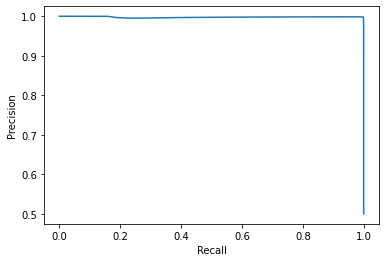

Model Accuracy 0.9982138443829854
FP rate [0.0017531788514536647, 0.001819132382575052]
TR rate [0.998180867617425, 0.9982468211485463]
Total Actual Positive i.e. attack 64036
Total Actual Negative,i.e. normal 443434
Total 507470
Total Positive & Negative predicted,  attack:  64767 ,normal 442703
TruePostive 63946 FalsePostive 821
TrueNegative 442613 FalseNegative 90
Test accuracy =   0.9815145804469017
DecisionTreeClassificationModel: uid=DecisionTreeClassifier_48f8871318c7, depth=4, numNodes=17, numClasses=14, numFeatures=48
  If (feature 42 <= 1.504145067545624)
   Predict: 0.0
  Else (feature 42 > 1.504145067545624)
   If (feature 3 <= 0.002162760202012499)
    If (feature 45 <= 0.36597286725012745)
     If (feature 1 <= 0.025626144557624846)
      Predict: 2.0
     Else (feature 1 > 0.025626144557624846)
      Predict: 3.0
    Else (feature 45 > 0.36597286725012745)
     If (feature 17 <= 0.3784864169446288)
      Predict: 1.0
     Else (feature 17 > 0.3784864169446288)
      Pred

In [ ]:
# Performance Measurements for Binary Classifier
#Evaluating the model
from pyspark.ml.evaluation import BinaryClassificationEvaluator

evaluator=BinaryClassificationEvaluator(rawPredictionCol='prediction',labelCol="Label")
# We have only two choices: area under ROC and PR curves :-(
auroc = evaluator.evaluate(predict_test, {evaluator.metricName: "areaUnderROC"})

print("Area under ROC Curve: {:.4f}".format(auroc))

predict_test.select("Label","prediction","probability").show(15)

print(model.summary)
import matplotlib.pyplot as plt
pr = model.summary.pr.toPandas()
plt.plot(pr['recall'],pr['precision'])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()
print("Model Accuracy",model.summary.accuracy)
print("FP rate",model.summary.falsePositiveRateByLabel)
print("TR rate",model.summary.truePositiveRateByLabel)
print("Total Actual Positive i.e. attack",predict_test.select("Label").where('Label == 1.0').count())
print("Total Actual Negative,i.e. normal",predict_test.select("Label").where('Label == 0.0').count())
pr = predict_test.toPandas()
TruePositive =0
FalsePositive=0
TrueNegative=0
FalseNegative=0
Postive=1.0
Negative=0.0
pos=0
Neg=0

print("Total",len(pr["Label"]))
for lbl in range(len(pr["Label"])):
  if  pr["prediction"][lbl]==Postive:
    pos+=1
    if pr["prediction"][lbl]==pr["Label"][lbl]:
      TruePositive+=1
    else:
      FalsePositive+=1
  if  pr["prediction"][lbl]==Negative:
    Neg+=1
    if pr["prediction"][lbl]==pr["Label"][lbl]:
      TrueNegative+=1
    else:
      FalseNegative+=1
print("Total Positive & Negative predicted,  attack: ",pos,",normal",Neg)
print("TruePostive",TruePositive,"FalsePostive",FalsePositive)     
print("TrueNegative",TrueNegative,"FalseNegative",FalseNegative)  

# Performance Measurements for Multi Classifier
evaluator = MulticlassClassificationEvaluator(
labelCol="attack_catIndex", predictionCol="prediction",
metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Test accuracy =  " , accuracy)
print(multiClassModel.toDebugString)

# **Convert ipynb to HTML for Turnitin submission**

---



In [ ]:
# install nbconvert (if facing with conversion error)
!pip3 install nbconvert 

In [ ]:
# convert ipynb to html

!jupyter nbconvert --to html ML.ipynb

[NbConvertApp] Converting notebook Group_27_ML_CN7030.ipynb to html
[NbConvertApp] Writing 435246 bytes to Group_27_ML_CN7030.html
